In [21]:
import json
import os

# 加载 model_infos.json
model_infos_path = '../model_infos.json'
with open(model_infos_path, 'r', encoding='utf-8') as f:
    model_infos = json.load(f)

print(f"成功加载 model_infos.json，共 {len(model_infos)} 条记录")
print(f"\n第一条记录示例：")
print(json.dumps(model_infos[0], indent=2, ensure_ascii=False))


成功加载 model_infos.json，共 9992 条记录

第一条记录示例：
{
  "model_id": "da64b6ef-d704-404b-a0e3-866d0e091362",
  "super-category": "Lighting",
  "category": "Pendant Lamp",
  "style": "Modern",
  "theme": null,
  "material": null,
  "size": {
    "xLen": 0.997,
    "zLen": 0.831,
    "yLen": 0.495
  },
  "is_train": 1
}


In [22]:
# 显示数据统计信息
print("数据统计信息：")
print(f"总记录数：{len(model_infos)}")

# 统计各个字段的唯一值数量
categories = set()
super_categories = set()
styles = set()

for item in model_infos:
    if item.get('super-category'):
        super_categories.add(item['super-category'])
    if item.get('category'):
        categories.add(item['category'])
    if item.get('style'):
        styles.add(item['style'])

print(f"超级类别数：{len(super_categories)}")
print(f"类别数：{len(categories)}")
print(f"风格数：{len(styles)}")
print(f"\n超级类别列表：{sorted(super_categories)}")


数据统计信息：
总记录数：9992
超级类别数：7
类别数：34
风格数：19

超级类别列表：['Bed', 'Cabinet/Shelf/Desk', 'Chair', 'Lighting', 'Pier/Stool', 'Sofa', 'Table']


In [23]:
# 定义当前支持的风格列表
supported_styles = ['Modern', 'Japanese', 'Minimalist', 'Korean', 'Industrial', 'Light Luxury']

# 筛选出支持风格的数据
filtered_model_infos = [item for item in model_infos if item.get('style') in supported_styles]

print(f"原始数据总数：{len(model_infos)}")
print(f"筛选后数据总数：{len(filtered_model_infos)}")
print(f"\n支持的风格：{supported_styles}")

# 统计各风格的数量
style_counts = {}
for item in filtered_model_infos:
    style = item.get('style')
    if style:
        style_counts[style] = style_counts.get(style, 0) + 1

print("\n各风格数据统计：")
for style in supported_styles:
    count = style_counts.get(style, 0)
    print(f"  {style}: {count} 条")


原始数据总数：9992
筛选后数据总数：6800

支持的风格：['Modern', 'Japanese', 'Minimalist', 'Korean', 'Industrial', 'Light Luxury']

各风格数据统计：
  Modern: 2445 条
  Japanese: 1412 条
  Minimalist: 1070 条
  Korean: 650 条
  Industrial: 629 条
  Light Luxury: 594 条


In [26]:
# 验证筛选结果
print("筛选后的数据示例（每个风格显示一条）：")
for style in supported_styles:
    examples = [item for item in filtered_model_infos if item.get('style') == style]
    if examples:
        print(f"\n{style} 风格示例：")
        print(json.dumps(examples[0], indent=2, ensure_ascii=False))


筛选后的数据示例（每个风格显示一条）：

Modern 风格示例：
{
  "model_id": "da64b6ef-d704-404b-a0e3-866d0e091362",
  "super-category": "Lighting",
  "category": "Pendant Lamp",
  "style": "Modern",
  "theme": null,
  "material": null,
  "size": {
    "xLen": 0.997,
    "zLen": 0.831,
    "yLen": 0.495
  },
  "is_train": 1
}

Japanese 风格示例：
{
  "model_id": "1aed6852-ee09-31b6-a260-9679d7d543eb",
  "super-category": "Sofa",
  "category": "Loveseat Sofa",
  "style": "Japanese",
  "theme": "Lines",
  "material": "Cloth",
  "size": {
    "xLen": 1.965,
    "zLen": 0.825,
    "yLen": 1.064
  },
  "is_train": 1
}

Minimalist 风格示例：
{
  "model_id": "02ab9d20-ee01-40b3-b3bc-9bdcc066d382",
  "super-category": "Cabinet/Shelf/Desk",
  "category": "Coffee Table",
  "style": "Minimalist",
  "theme": "Smooth Net",
  "material": "Others",
  "size": {
    "xLen": 1.134,
    "zLen": 0.582,
    "yLen": 1.132
  },
  "is_train": 1
}

Korean 风格示例：
{
  "model_id": "4d5ff861-d5ce-4f10-90c2-c064b1845199",
  "super-category": "Cabinet/S

In [ ]:
!pip install matplotlib

In [31]:
# 剔除任一关键字段为 None，且 size 完整的物品，并查看剩余数量
original_count = len(filtered_model_infos)

REQUIRED_FIELDS = ['super-category', 'category', 'style', 'theme', 'material']

def is_valid_item(item):
    """检查物品是否有效：关键字段均非 None，且 size 完整"""
    # 关键字段均需非 None
    for k in REQUIRED_FIELDS:
        if item.get(k) is None:
            return False
    
    # 检查 size
    size = item.get('size')
    if size is None:
        return False
    
    # 检查 size 中的 xLen, zLen, yLen 是否都不为 None
    if (size.get('xLen') is None or 
        size.get('zLen') is None or 
        size.get('yLen') is None):
        return False
    
    return True

filtered_no_none = [item for item in filtered_model_infos if is_valid_item(item)]
new_count = len(filtered_no_none)
retained_ratio = (new_count / original_count * 100) if original_count else 0

print(f"原有筛选数据量：{original_count}")
print(f"剔除任一关键字段为 None 或 size 不完整后的数据量：{new_count}")
print(f"保留比例：{retained_ratio:.2f}%")

# 统计剔除原因
counts = {k: sum(1 for it in filtered_model_infos if it.get(k) is None) for k in REQUIRED_FIELDS}
size_none_count = sum(1 for it in filtered_model_infos if it.get('size') is None)
size_incomplete_count = sum(1 for it in filtered_model_infos 
                             if it.get('size') and (
                                 it.get('size').get('xLen') is None or
                                 it.get('size').get('zLen') is None or
                                 it.get('size').get('yLen') is None
                             ))

print("\n剔除原因统计：")
for k in REQUIRED_FIELDS:
    print(f"  {k} 为 None: {counts[k]} 条")
print(f"  size 为 None: {size_none_count} 条")
print(f"  size 中 xLen/zLen/yLen 有 None: {size_incomplete_count} 条")

# 如需将后续流程都基于清洗后的数据，可取消下一行注释：
# filtered_model_infos = filtered_no_none


原有筛选数据量：6800
剔除任一关键字段为 None 或 size 不完整后的数据量：6144
保留比例：90.35%

剔除原因统计：
  super-category 为 None: 0 条
  category 为 None: 0 条
  style 为 None: 0 条
  theme 为 None: 656 条
  material 为 None: 656 条
  size 为 None: 0 条
  size 中 xLen/zLen/yLen 有 None: 0 条


In [32]:
# 验证筛选结果
print("筛选后的数据示例（每个风格显示一条）：")
for style in supported_styles:
    examples = [item for item in filtered_no_none if item.get('style') == style]
    if examples:
        print(f"\n{style} 风格示例：")
        print(json.dumps(examples[0], indent=2, ensure_ascii=False))


筛选后的数据示例（每个风格显示一条）：

Modern 风格示例：
{
  "model_id": "b520ee41-01c6-4e9b-9e82-a9cf9fca9317",
  "super-category": "Table",
  "category": "Dressing Table",
  "style": "Modern",
  "theme": "Smooth Net",
  "material": "Composite Board",
  "size": {
    "xLen": 1.2,
    "zLen": 1.078,
    "yLen": 0.571
  },
  "is_train": 1
}

Japanese 风格示例：
{
  "model_id": "1aed6852-ee09-31b6-a260-9679d7d543eb",
  "super-category": "Sofa",
  "category": "Loveseat Sofa",
  "style": "Japanese",
  "theme": "Lines",
  "material": "Cloth",
  "size": {
    "xLen": 1.965,
    "zLen": 0.825,
    "yLen": 1.064
  },
  "is_train": 1
}

Minimalist 风格示例：
{
  "model_id": "02ab9d20-ee01-40b3-b3bc-9bdcc066d382",
  "super-category": "Cabinet/Shelf/Desk",
  "category": "Coffee Table",
  "style": "Minimalist",
  "theme": "Smooth Net",
  "material": "Others",
  "size": {
    "xLen": 1.134,
    "zLen": 0.582,
    "yLen": 1.132
  },
  "is_train": 1
}

Korean 风格示例：
{
  "model_id": "4d5ff861-d5ce-4f10-90c2-c064b1845199",
  "super-cat

筛选后各超级类数量： {'Lighting': 662, 'Cabinet/Shelf/Desk': 2567, 'Table': 456, 'Sofa': 1451, 'Pier/Stool': 302, 'Bed': 582, 'Chair': 780}
筛选后各类别数量（TOP 20 显示）：
  Three-seat / Multi-seat Sofa: 544
  Pendant Lamp: 534
  Coffee Table: 512
  armchair: 457
  Lounge Chair / Cafe Chair / Office Chair: 426
  Corner/Side Table: 409
  Sideboard / Side Cabinet / Console table: 318
  Footstool / Sofastool / Bed End Stool / Stool: 302
  Dining Table: 288
  Loveseat Sofa: 276
  Nightstand: 274
  Dining Chair: 273
  King-size Bed: 260
  TV Stand: 240
  Wardrobe: 220
  Drawer Chest / Corner cabinet: 171
  Bed Frame: 144
  Bookcase / jewelry Armoire: 143
  Ceiling Lamp: 128
  Single bed: 110


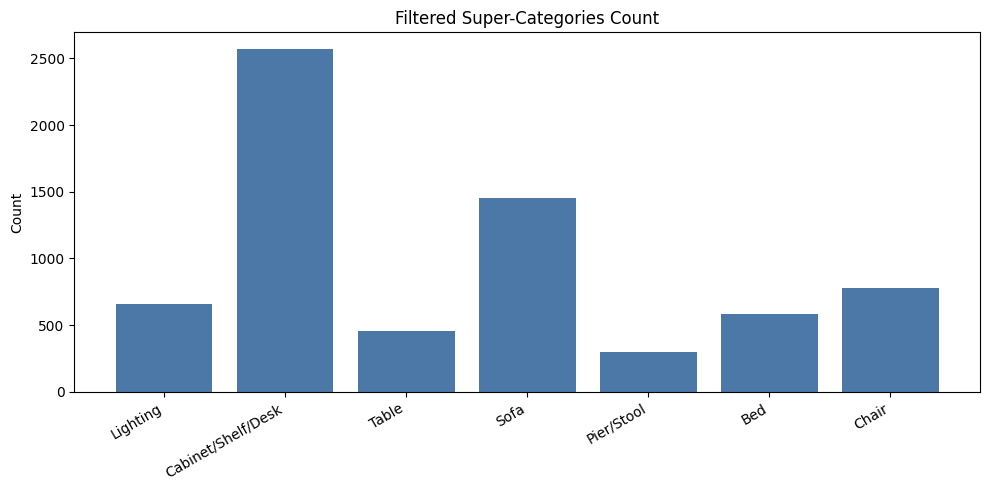

超级类柱状图已保存：../outputs/filtered_super_categories_bar.png


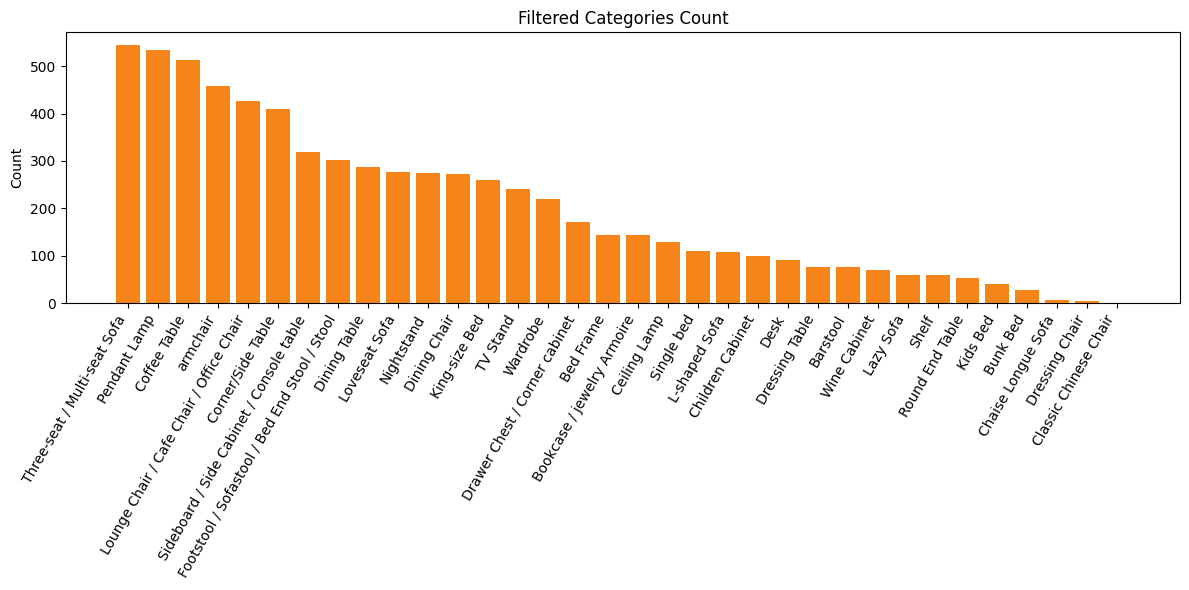

类别柱状图已保存：../outputs/filtered_categories_bar.png


In [38]:
from collections import Counter
import matplotlib.pyplot as plt
import os

# 统计筛选后数据的超级类与类别计数
super_counter = Counter()
category_counter = Counter()
for item in filtered_model_infos:
    sc = item.get('super-category') or 'Unknown'
    cat = item.get('category') or 'Unknown'
    super_counter[sc] += 1
    category_counter[cat] += 1

print('筛选后各超级类数量：', dict(super_counter))
print('筛选后各类别数量（TOP 20 显示）：')
for name, cnt in category_counter.most_common(20):
    print(f'  {name}: {cnt}')

# 输出目录
out_dir = '../outputs'
os.makedirs(out_dir, exist_ok=True)

# 绘制超级类柱状图
plt.figure(figsize=(10, 5))
sc_names = list(super_counter.keys())
sc_values = [super_counter[n] for n in sc_names]
plt.bar(sc_names, sc_values, color='#4C78A8')
plt.ylabel('Count')
plt.title('Filtered Super-Categories Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
sc_path = os.path.join(out_dir, 'filtered_super_categories_bar.png')
plt.savefig(sc_path, dpi=200)
plt.show()
print(f'超级类柱状图已保存：{sc_path}')

# 绘制类别柱状图（按数量降序，显示全部；如类别很多会较长）
plt.figure(figsize=(12, 6))
cat_items = category_counter.most_common()
cat_names = [n for n, _ in cat_items]
cat_values = [v for _, v in cat_items]
plt.bar(cat_names, cat_values, color='#F58518')
plt.ylabel('Count')
plt.title('Filtered Categories Count')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
cat_path = os.path.join(out_dir, 'filtered_categories_bar.png')
plt.savefig(cat_path, dpi=200)
plt.show()
print(f'类别柱状图已保存：{cat_path}')


In [33]:
# 可选：保存筛选后的数据到新文件
save_filtered = True  # 设置为 False 如果不想保存

if save_filtered:
    filtered_output_path = '../model_infos_filtered_no_none.json'
    with open(filtered_output_path, 'w', encoding='utf-8') as f:
        json.dump(filtered_no_none, f, ensure_ascii=False, indent=2)
    print(f"筛选后的数据已保存到：{filtered_output_path}")
else:
    print("未保存筛选后的数据")

筛选后的数据已保存到：../model_infos_filtered_no_none.json


In [41]:
import random
import numpy as np
import json

# --- 优化后的价格生成策略 (基于联网检索核对) ---

# 1. 基础价格（按精细的 'category' 品类）
category_base_prices = {
    # 床类 (Beds)
    'Double/Queen/King Bed': 2000,
    'Bed Frame': 1500,
    'Bunk Bed': 2200,
    'Kids Bed': 1800,
    'Single Bed': 1200,
    
    # 沙发/椅类 (Sofas/Chairs)
    'Three-Seat Sofa': 2800,
    'L-shaped Sofa': 4000,
    'Loveseat Sofa': 2200,
    'Armchair': 800, # 单人沙发椅
    'Lazy Sofa': 700,
    'Dining Chair': 300,
    'Lounge/Office Chair': 700,
    'Barstool': 400,
    'Pier/Stool': 200,
    
    # 柜类 (Cabinets)
    'Wardrobe': 3000, # 衣柜
    'TV Stand': 800,  # 电视柜
    'Bookcase / jewelry Armoire': 1200, # 书柜/珠宝柜
    'Nightstand': 300, # 床头柜
    'Children Cabinet': 1000,
    'Side Cabinet': 1000,
    'Wine Cabinet': 1500,
    'Drawer Chest': 1000,
    'Shelf': 500,
    
    # 桌类 (Tables)
    'Dining Table': 1500,
    'Coffee Table': 600,
    'Dressing Table': 800,
    'Desk': 700,
    'Side Table': 300,
    'Round End Table': 300,
    
    # 灯具 (Lighting)
    'Pendant Lamp': 400,
    'Ceiling Lamp': 300,
    
    # 默认值
    'default': 1000 
}

# 2. 风格系数 (调整基准)
style_multipliers = {
    'Light Luxury': 1.8,   # 轻奢：最高溢价
    'Industrial': 1.2,      # 工业：中等溢价
    'Japanese': 1.1,        # 日式：略微溢价
    'Korean': 1.05,         # 韩式：略微溢价
    
    # 备注：现代和极简在中国市场通常是基础款，设为 1.0
    'Modern': 1.0,          # 现代：基准价格
    'Minimalist': 1.0,      # 极简：基准价格
    'Others': 1.0
}

# 3. 材料系数 (调整实木溢价)
material_multipliers = {
    'Marble': 2.5,          # 大理石：非常昂贵
    'Smooth Leather': 2.2,  # 真皮：昂贵
    'Solid Wood': 2.2,      # 实木：昂贵 (从 1.6 调高)
    'Stone': 2.0,           # 石材：昂贵
    'Glass': 1.3,           # 玻璃：中等偏上
    'Metal': 1.2,           # 金属：中等
    'Wood': 1.2,            # 木材 (通常指木皮或非纯实木)：中等
    'Plywood': 1.0,         # 胶合板：基础
    'Cloth': 0.9,           # 布料：略低
    'Rough Cloth': 0.85,    # 粗布：较低
    'Composite Board': 0.8, # 复合板：较低
    'Composition': 0.85,    # 复合材料：较低
    'Others': 1.0,          # 其他：基础
    None: 0.9               # 无材料信息：略低
}

# 4. 尺寸系数
def calculate_size_factor(size):
    """根据尺寸计算价格系数"""
    if size is None:
        return 1.0
    
    # 确保我们有默认值，避免 0 体积
    x = size.get('xLen', 1.0) or 1.0
    z = size.get('zLen', 1.0) or 1.0
    y = size.get('yLen', 1.0) or 1.0
    
    # 计算体积 (m^3)
    volume = x * z * y
    
    # 使用立方根，使价格增长更合理（非线性但不太激进）
    # (体积 1 -> 系数 1.0, 体积 8 -> 系数 2.0)
    # 我们使用 power(volume, 0.5) 即平方根，使大件物品更贵
    # 0.33 (立方根) -> 0.5 (平方根)
    size_factor = np.power(volume, 0.5) 
    
    # 限制范围：最小0.5倍，最大3.0倍
    size_factor = max(0.5, min(3.0, size_factor))
    
    return size_factor

def generate_price(item):
    """
    为单个家具项目生成价格（人民币）
    
    价格公式：
    最终价格 = 基础价格 × 风格系数 × 材料系数 × 尺寸系数 × 随机波动
    """
    
    category = item.get('category')
    base_price = category_base_prices.get(category, category_base_prices['default'])
    
    # 获取风格系数
    style = item.get('style')
    style_mult = style_multipliers.get(style, 1.0)
    
    # 获取材料系数
    material = item.get('material')
    material_mult = material_multipliers.get(material, 1.0)
    
    # 计算尺寸系数
    size = item.get('size')
    size_factor = calculate_size_factor(size)
    
    # 计算基础价格
    calculated_price = base_price * style_mult * material_mult * size_factor
    
    # 添加随机波动（±20%），使价格更自然
    random_factor = random.uniform(0.8, 1.2)
    final_price = calculated_price * random_factor
    
    # 四舍五入到十位或百位，使价格更真实（如 2580, 3200）
    final_price = round(final_price / 10) * 10
    
    # 设置最小值（避免价格过低）
    final_price = max(100, final_price)
    
    return int(final_price)

# ---------------------------------
# 测试价格生成
# ---------------------------------
if __name__ == "__main__":
    # 1. 加载您的 model_infos.json 数据
    try:
        with open('../model_infos_filtered.json', 'r', encoding='utf-8') as f:
            model_infos = json.load(f)
        print(f"成功加载 {len(model_infos)} 条家具数据。")

        # 2. 测试价格生成
        print("\n--- 价格生成策略测试 (基于优化后的函数) ---")
        
        # 随机抽取5个样本进行测试
        test_cases = random.sample(filtered_model_infos, 5)
        
        for i, item in enumerate(test_cases, 1):
            price = generate_price(item)
            item['generated_price_cny'] = price # 将价格添加回字典
            
            print(f"\n--- 案例 {i} ---")
            print(json.dumps(item, indent=2, ensure_ascii=False))

        # 3. 将价格添加回所有数据并保存新文件
        output_data = []
        for item in model_infos:
            price = generate_price(item)
            item['price_cny'] = price
            output_data.append(item)
            
        with open('model_infos_with_price.json', 'w', encoding='utf-8') as f:
            json.dump(output_data, f, indent=4, ensure_ascii=False)
            
        print(f"\n--- 成功：已将价格保存到 'model_infos_with_price.json' ---")

    except FileNotFoundError:
        print("\n[错误] 未找到 'model_infos.json' 文件。")
        print("请将 'model_infos.json' 文件放在此脚本的同一目录中。")
    except Exception as e:
        print(f"\n[错误] 处理文件时出错: {e}")


成功加载 6800 条家具数据。

--- 价格生成策略测试 (基于优化后的函数) ---

--- 案例 1 ---
{
  "model_id": "7cfc39e8-1e10-4487-93ba-dc811893ba21",
  "super-category": "Sofa",
  "category": "armchair",
  "style": "Light Luxury",
  "theme": "Striped Grid",
  "material": "Cloth",
  "size": {
    "xLen": 0.674,
    "zLen": 0.839,
    "yLen": 0.619
  },
  "is_train": 0,
  "generated_price_cny": 990
}

--- 案例 2 ---
{
  "model_id": "71590a01-e0f2-4877-bc92-8a1088bf4a74",
  "super-category": "Cabinet/Shelf/Desk",
  "category": "Corner/Side Table",
  "style": "Minimalist",
  "theme": "Smooth Net",
  "material": "Metal",
  "size": {
    "xLen": 0.641,
    "zLen": 0.53,
    "yLen": 0.487
  },
  "is_train": 1,
  "generated_price_cny": 560
}

--- 案例 3 ---
{
  "model_id": "258cc528-3276-4346-8469-af9daee2308d",
  "super-category": "Cabinet/Shelf/Desk",
  "category": "Corner/Side Table",
  "style": "Industrial",
  "theme": "Smooth Net",
  "material": "Wood",
  "size": {
    "xLen": 0.499,
    "zLen": 0.479,
    "yLen": 0.499
  },


In [47]:
import json
from collections import Counter
import os
import matplotlib.pyplot as plt

# 加载带价格的数据（相对路径基于本 notebook 所在目录）
with_price_path = './model_infos_with_price.json'
with open(with_price_path, 'r', encoding='utf-8') as f:
    data_with_price = json.load(f)

print(f"已加载带价格数据：{len(data_with_price)} 条")

# 基础统计
categories = [it.get('category') for it in data_with_price if it.get('category') is not None]
styles = [it.get('style') for it in data_with_price if it.get('style') is not None]
prices = [it.get('price_cny') for it in data_with_price if isinstance(it.get('price_cny'), (int, float))]

cat_counter = Counter(categories)
style_counter = Counter(styles)

print(f"品类数：{len(cat_counter)}，风格数：{len(style_counter)}，有效价格条数：{len(prices)}")


已加载带价格数据：6800 条
品类数：34，风格数：6，有效价格条数：6800


各品类数据条数：
  Three-seat / Multi-seat Sofa: 544 条, 平均价 ¥1,770
  Pendant Lamp: 534 条, 平均价 ¥239
  Coffee Table: 512 条, 平均价 ¥653
  armchair: 457 条, 平均价 ¥945
  Lounge Chair / Cafe Chair / Office Chair: 426 条, 平均价 ¥814
  Corner/Side Table: 409 条, 平均价 ¥735
  Sideboard / Side Cabinet / Console table: 318 条, 平均价 ¥1,058
  Footstool / Sofastool / Bed End Stool / Stool: 302 条, 平均价 ¥587
  Dining Table: 288 条, 平均价 ¥2,493
  Loveseat Sofa: 276 条, 平均价 ¥3,196
  Nightstand: 274 条, 平均价 ¥187
  Dining Chair: 273 条, 平均价 ¥208
  King-size Bed: 260 条, 平均价 ¥2,660
  TV Stand: 240 条, 平均价 ¥775
  Wardrobe: 220 条, 平均价 ¥6,574
  Drawer Chest / Corner cabinet: 171 条, 平均价 ¥1,019
  Bed Frame: 144 条, 平均价 ¥3,961
  Bookcase / jewelry Armoire: 143 条, 平均价 ¥1,640
  Ceiling Lamp: 128 条, 平均价 ¥161
  Single bed: 110 条, 平均价 ¥2,497
  L-shaped Sofa: 108 条, 平均价 ¥11,282
  Children Cabinet: 99 条, 平均价 ¥1,314
  Desk: 91 条, 平均价 ¥998
  Dressing Table: 77 条, 平均价 ¥948
  Barstool: 76 条, 平均价 ¥298
  Wine Cabinet: 70 条, 平均价 ¥2,433
  Lazy Sofa: 59 条,

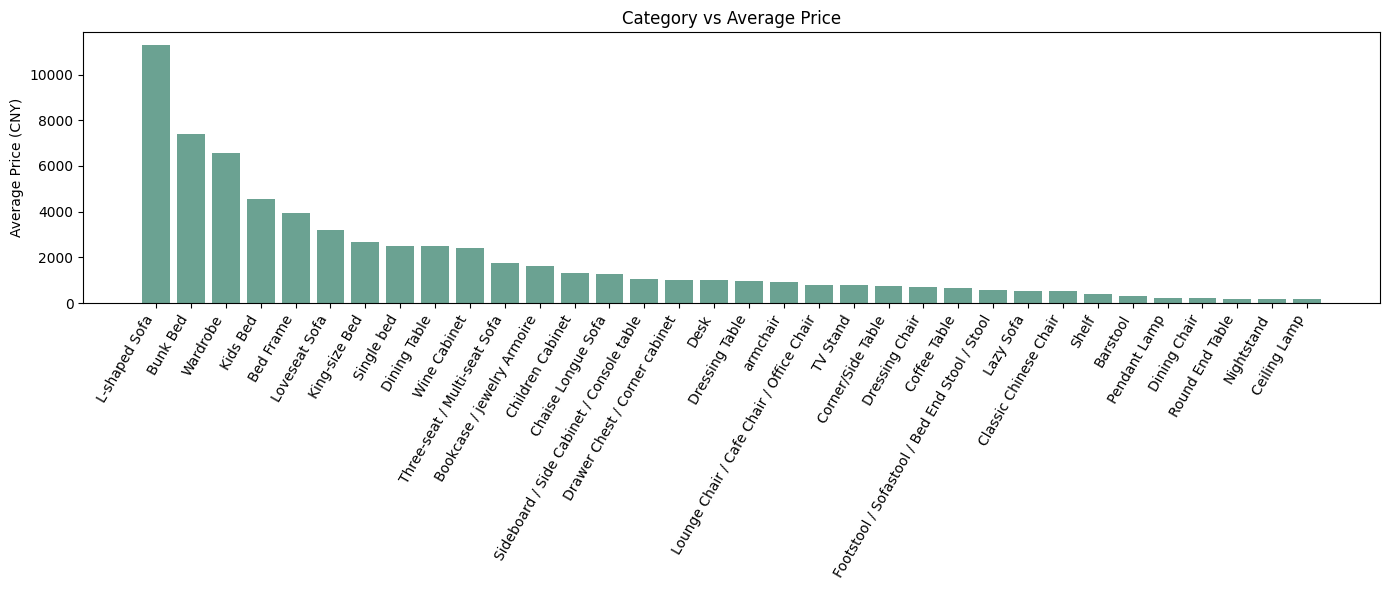

品类-平均价格柱状图已保存：../outputs/with_price_category_avg_price.png


In [49]:
# 各品类条数与平均价格统计，并绘制柱状图
from collections import defaultdict
import numpy as np

# 保证数据存在
data = data_with_price if 'data_with_price' in globals() else []

# 统计各品类条数与价格汇总
category_to_prices = defaultdict(list)
for it in data:
    cat = it.get('category')
    price = it.get('price_cny')
    if cat is not None and isinstance(price, (int, float)):
        category_to_prices[cat].append(price)

# 计算条数与均价
category_stats = []  # (category, count, avg_price)
for cat, plist in category_to_prices.items():
    if len(plist) > 0:
        category_stats.append((cat, len(plist), float(np.mean(plist))))

# 按条数降序打印
category_stats_sorted_by_count = sorted(category_stats, key=lambda x: x[1], reverse=True)
print("各品类数据条数：")
for cat, cnt, avgp in category_stats_sorted_by_count:
    print(f"  {cat}: {cnt} 条, 平均价 ¥{avgp:,.0f}")

# 按平均价格降序绘图
category_stats_sorted_by_avg = sorted(category_stats, key=lambda x: x[2], reverse=True)
labels = [c for c, _, _ in category_stats_sorted_by_avg]
avgs = [ap for _, _, ap in category_stats_sorted_by_avg]

plt.figure(figsize=(14, 6))
plt.bar(labels, avgs, color='#6BA292')
plt.ylabel('Average Price (CNY)')
plt.title('Category vs Average Price')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

avg_price_path = os.path.join('../outputs', 'with_price_category_avg_price.png')
os.makedirs('../outputs', exist_ok=True)
plt.savefig(avg_price_path, dpi=200)
plt.show()
print(f"品类-平均价格柱状图已保存：{avg_price_path}")
